# CELLPHONE MARKET RESEARCH

### 1. ABSTRACT
This project offers a quick look at the possibility of identifying the potentials of a cellphone market in anywhere in the world by using just a few socio-economic indicators. 

### 2. MOTIVATIONS
Mobile devices are quickly becoming more affordable and more powerful. They are becoming the key piece in various business models such as car hailing, home delivery, personal payment systems, online retails, personalized education, and so on.
Recognizing emerging cellular communication markets is extremely beneficial to active players in various industries.



In [2]:
### importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#import folium
%matplotlib inline

## 3. RESEARCH QUESTIONS
* What are the potential indicators for a good, fast growing cellular communication market?
* What are the potential top 5 cellular communication markets as of 2016?
* Is it possible to build a model to predict the growth of any cellular communication market in the world by using just a few common economic/social indicators?

## 4. DATASET
The original dataset is the World Development Indicators Dataset:<br/>
( https://data.worldbank.org/data-catalog/world-development-indicators ) <br/>
* 5656458 data entries, 6 columns
* 247 countries, over 1300 indicators
* From 1995 to 2015
* Published by the World Bank


In [3]:
# import data
data = pd.read_csv('./wdi/Indicators.csv')

In [4]:
data.columns

Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')

Because the World's mobile phone subscriptions prior to the year 1995 is not significant, we will only consider the World's data collected after 1995 <br/>
 <img src="./wdi/cellphoneSubscriptions.png"> <br/>
 * The World's cellphone subscriptions <br/>
(Ref: https://data.worldbank.org/indicator/IT.CEL.SETS?view=chart ) <br/>

In [6]:
# trim out entries prior to 1995
data_post1995 = data.loc[data['Year'] >= 1995]
data_post1995.shape

(3171353, 6)

In [7]:
#check for null values in any cell
data_post1995.isnull().any().any()

False

#### THE SHAPE OF THE DATA SET

In [9]:
countries = data_post1995['CountryName'].unique().tolist()
countryCodes = data_post1995['CountryCode'].unique().tolist()
indicators = data_post1995['IndicatorName'].unique().tolist()
indicator_codes = data_post1995['IndicatorCode'].unique().tolist()
print ('Countries:',len(countries),'  Indicators:',len(indicators))
print ('Shape of data_post1995: ', data_post1995.shape)

Countries: 247   Indicators: 1344
Shape of data_post1995:  (3171353, 6)


#### CELLPHONE SUBSCRIPTIONS - DATA FRAME

In [14]:
df_cellphone = data.loc[(data['IndicatorName'] == 'Mobile cellular subscriptions') & (data['Year'] >= 1995)]
df_cellphone = df_cellphone.drop(['IndicatorName', 'IndicatorCode'], axis=1)
df_cellphone.columns = ['CountryName','CountryCode','Year','Cellphone']
df_cellphone.head(3)

,CountryName,CountryCode,Year,Cellphone
2485343,Arab World,ARB,1995,501551.0
2485757,Caribbean small states,CSS,1995,66297.0
2486225,Central Europe and the Baltics,CEB,1995,552442.0


In [41]:
# calculate the mean cellular subscription for each country over the entire time span from 1995 to 2016
# in other words, this represents the growth of the market over the years
df_cellphone_mean_byCountry = df_cellphone.groupby(['CountryName','CountryCode'], as_index=False).mean()
df_cellphone_mean_byCountry = df_cellphone_mean_byCountry.drop(['Year'], axis=1)
df_cellphone_mean_byCountry.sort_values(by=['Cellphone'], inplace=True, ascending=False)
df_cellphone_mean_byCountry.head(15)

,CountryName,CountryCode,Cellphone
237,World,WLD,2.768407e+09
127,Low & middle income,LMY,1.788254e+09
146,Middle income,MIC,1.706917e+09
92,High income,HIC,9.801528e+08
229,Upper middle income,UMC,9.259055e+08
58,East Asia & Pacific (all income levels),EAS,9.030787e+08
165,OECD members,OED,8.354587e+08
129,Lower middle income,LMC,7.810120e+08
93,High income: OECD,OEC,7.492414e+08
59,East Asia & Pacific (developing only),EAP,7.245421e+08


#### CORRELATED INDICATORS - DATA FRAME

In [38]:
#Warning: this piece of code will take a while to finish
df_features = pd.DataFrame({'IndicatorCode':['a'],'Correlation':[0.0],'Length':[0]})
for f in indicator_codes:
    temp = data_post1995.loc[(data_post1995['IndicatorCode'] == f)]
    temp = temp.drop(['IndicatorName', 'IndicatorCode'], axis=1)
    temp.columns = ['CountryName','CountryCode','Year', f]
    temp = df_cellfone.merge(temp, on=['CountryCode','Year'], how='inner')
    related = temp['Cellphone'].corr(temp[f])
    #uncomment the line below if you want to see the progress
    #print("%s: %f" % (f,related))
    if (related >= 0.85):
        df_features.loc[-1] = [related,f,len(temp)]
        df_features.index = df_features.index + 1
        df_features = df_features.sort_index()

df_indicators = pd.DataFrame([indicators,indicator_codes])
df_indicators = df_indicators.transpose()
df_indicators.columns = ['Indicator Names', 'IndicatorCode']
df_features = df_features.merge(df_indicators, on=['IndicatorCode'])
df_features_sorted = df_features.sort_values(by=['Correlation'], ascending=False)
#df_features_sorted.head(25)

,Correlation,IndicatorCode,Length,Indicator Names
53,1.000000,IT.CEL.SETS,4683,Mobile cellular subscriptions
11,0.973193,ER.H2O.FWTL.K3,545,"Annual freshwater withdrawals, total (billion ..."
0,0.955018,DT.DOD.PVLX.CD,117,Present value of external debt (current US$)
3,0.948240,BX.TRF.PWKR.CD,1583,"Personal transfers, receipts (BoP, current US$)"
56,0.944459,NV.AGR.TOTL.CD,4128,"Agriculture, value added (current US$)"
51,0.932751,BX.TRF.PWKR.CD.DT,3793,"Personal remittances, received (current US$)"
27,0.924596,DT.DOD.PNGC.CD,2559,"PNG, commercial banks and other creditors (DOD..."
38,0.923879,DT.DOD.DSTC.CD,2559,"External debt stocks, short-term (DOD, current..."
32,0.922053,DT.NFL.DECT.CD,2559,"Net flows on external debt, total (NFL, curren..."
40,0.921564,DT.DOD.PRVS.CD,2559,"External debt stocks, long-term private sector..."


In [ ]:
df_features_sorted.head(25)

## 5. EXPLORATIONS

### TOP MARKETS BY SUBSCRIPTION GROWTH

In [123]:
# calculate the mean cellular subscription for each country over the entire time span from 1995 to 2016
# in other words, this represents the growth of the market over the years
df_cellphone_mean_byCountry = df_cellphone.groupby(['CountryName','CountryCode'], as_index=False).mean()
df_cellphone_mean_byCountry = df_cellphone_mean_byCountry.drop(['Year'], axis=1)
df_cellphone_mean_byCountry.sort_values(by=['Cellphone'], inplace=True, ascending=False)
# adjust the number of output to your liking
df_cellphone_mean_byCountry.head(10)

,CountryName,CountryCode,Cellphone
237,World,WLD,2.768407e+09
127,Low & middle income,LMY,1.788254e+09
146,Middle income,MIC,1.706917e+09
92,High income,HIC,9.801528e+08
229,Upper middle income,UMC,9.259055e+08
58,East Asia & Pacific (all income levels),EAS,9.030787e+08
165,OECD members,OED,8.354587e+08
129,Lower middle income,LMC,7.810120e+08
93,High income: OECD,OEC,7.492414e+08
59,East Asia & Pacific (developing only),EAP,7.245421e+08


###  TOP MARKET BY TOTAL NUMBER OF SUBSCRIBERS (2014)

In [120]:
df_marketsize = df_cellphone.loc[(df_cellphone['Year'] >= 2014)]
df_marketsize = df_marketsize.sort_values(by=['Cellphone'], ascending=False)
#adjust number to fit your liking
df_marketsize.head(10)

,CountryName,CountryCode,Year,Cellphone
5546237,World,WLD,2014,6.965109e+09
5540381,Low & middle income,LMY,2014,5.242403e+09
5542657,Middle income,MIC,2014,4.891370e+09
5541391,Lower middle income,LMC,2014,2.470834e+09
5545827,Upper middle income,UMC,2014,2.420537e+09
5535330,East Asia & Pacific (all income levels),EAS,2014,2.366462e+09
5535690,East Asia & Pacific (developing only),EAP,2014,2.061189e+09
5538270,High income,HIC,2014,1.722706e+09
5543316,OECD members,OED,2014,1.404643e+09
5564580,China,CHN,2014,1.286093e+09


### EXAMINING TOP INDICATORS


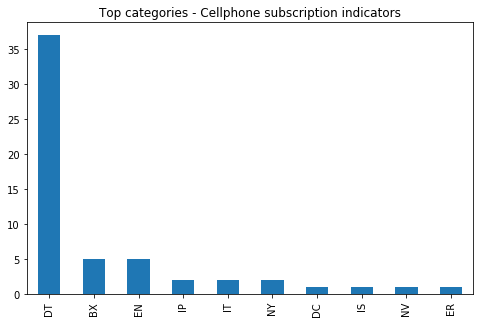

In [127]:
df_features_codeCount = df_features['IndicatorCode'].str.split('.', expand=True)
df_features_codeCount.drop(df_features_codeCount.index[1:6], axis = 1, inplace=True)
df_features_codeCount = df_features_codeCount[df_features_codeCount.index[0]].value_counts()
df_features_codeCount.plot(kind='bar', figsize=(8,5), title='Top categories - Cellphone subscription indicators')
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

DT : external debt <br/>
BX : balance of payments relating to exports <br/>
EN : general environment <br/>
IP : intellectual property <br/>
NY : National accounts relating to income <br/>
IT : telecommunication infrastructure <br/>
IS : transportation infrastructure <br/>
DC : Debts relating to aid flows from DAC <br/>
ER : Environment resources <br/>
NV : National accounts - value added <br/>
<br/>
Note that the distribution of indicator group types is heavily leaned toward DT group - all external debt related indicators. If we want to pick the best indicators with good group spread, we should end up with this top 10 indicators<br/>
<br/>
Agriculture, value added : NV.AGR.TOTL.CD<br/>
Personal remittances, received : BX.TRF.PWKR.CD.DT<br/>
Net flows on external debt, total : DT.NFL.DECT.CD<br/>
Container port traffic : IS.SHP.GOOD.TU<br/>
Trademark applications, direct resident : IP.TMK.RESD<br/>
Primary income on FDI, payments : BX.KLT.DREM.CD.DT<br/>
HFC gas emissions (thousand metric tons of CO2) : EN.ATM.HFCG.KT.CE<br/>
Fixed broadband subscriptions : IT.NET.BBND<br/>
Grants, excluding technical cooperation : BX.GRT.EXTA.CD.WD<br/>
GDP, PPP : NY.GDP.MKTP.PP.CD<br/>

In [129]:
# Record the list of top 10 indicators here
featured_codes=['NV.AGR.TOTL.CD',
                'BX.TRF.PWKR.CD.DT',
                'DT.NFL.DECT.CD',
                'IS.SHP.GOOD.TU',
                'IP.TMK.RESD',
                'BX.KLT.DREM.CD.DT',
                'EN.ATM.HFCG.KT.CE',
                'IT.NET.BBND',
                'BX.GRT.EXTA.CD.WD',
                'NY.GDP.MKTP.PP.CD']

In [132]:
# This will output the list of scalled correlation score per country per selected indicator
df_features_combined = df_cellfone
for f in featured_codes:
    temp3 = data_post1995.loc[(data_post1995['IndicatorCode'] == f)]
    temp3 = temp3.drop(['IndicatorName', 'IndicatorCode'], axis=1)
    temp3.columns = ['CountryName','CountryCode','Year', f]
    df_features_combined = df_features_combined.merge(temp3, on=['CountryName','CountryCode','Year'], how='inner')
    #get the relationship of each indicator with "Cellphone"
    df_features_combined[f] = df_features_combined[f]/df_features_combined['Cellphone']
#drop "Cellphone" out of the df
df_features_combined = df_features_combined.drop('Cellphone', axis=1)
df_features_combined = df_features_combined.groupby(['CountryName','CountryCode'], as_index=False).mean()
df_features_combined = df_features_combined.drop(['Year'], axis=1)

df_features_scaled = df_features_combined
for f in featured_codes:
    df_features_scaled[[f]] = MinMaxScaler().fit_transform(df_features_scaled[[f]])
    
df_features_scaled.head(10)

,CountryName,CountryCode,NV.AGR.TOTL.CD,BX.TRF.PWKR.CD.DT,DT.NFL.DECT.CD,IS.SHP.GOOD.TU,IP.TMK.RESD,BX.KLT.DREM.CD.DT,EN.ATM.HFCG.KT.CE,IT.NET.BBND,BX.GRT.EXTA.CD.WD,NY.GDP.MKTP.PP.CD
0,Albania,ALB,0.758783,0.796579,0.962113,0.020617,0.016528,0.320995,0.134760,0.395597,0.504490,0.235396
1,Algeria,DZA,0.261615,0.000000,0.124866,0.005332,0.000000,0.313508,0.026375,0.294799,0.007416,0.288003
2,Bangladesh,BGD,0.181024,0.226994,0.182388,0.015685,0.023121,0.043964,0.000000,0.037796,0.167775,0.080030
3,Brazil,BRA,0.511498,0.038432,0.333189,0.047933,0.486086,0.336793,0.048787,0.483692,0.003658,0.750437
4,Cambodia,KHM,0.453048,0.033311,0.239463,0.032414,0.019469,0.154431,0.000000,0.043555,0.485045,0.072987
5,China,CHN,0.813732,0.023210,0.219376,0.185244,0.468004,0.347457,1.000000,1.000000,0.002795,0.522203
6,Colombia,COL,1.000000,0.342387,0.209603,0.095414,0.349849,0.464771,0.000000,0.324327,0.112191,0.974727
7,Costa Rica,CRI,0.878420,0.351762,1.000000,0.376157,1.000000,1.000000,0.137024,0.901302,0.131438,0.661011
8,Ecuador,ECU,0.353467,0.354819,0.141588,0.059806,0.334113,0.187223,0.025585,0.116039,0.107549,0.246364
9,Georgia,GEO,0.154979,0.438411,0.666199,0.055280,0.053382,0.262645,0.017431,0.465348,1.000000,0.120384


#### Let's pick 3 countries and examine the correlation score of each indicator further

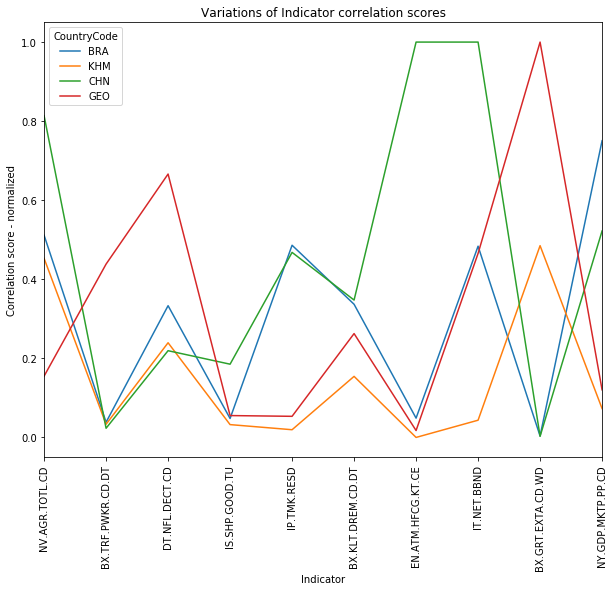

In [190]:
mask_countries = df_features_scaled['CountryCode'].str.contains('CHN|BRA|KHM|GEO')
df_features_scalled_masked_countries = df_features_scaled[mask_countries]
df_features_scalled_masked_countries = df_features_scalled_masked_countries.drop(['CountryName'], axis=1)
df_features_scalled_masked_countries.set_index('CountryCode', inplace=True)
df_features_scalled_masked_countries = df_features_scalled_masked_countries.transpose()

ax = df_features_scalled_masked_countries.plot(kind='line', figsize=(10,8),)

# Label the axes
plt.xlabel('Indicator')
plt.ylabel('Correlation score - normalized')
plt.xticks(rotation=90)
#label the figure
plt.title('Variations of Indicator correlation scores')

plt.show()

Clearly, the overal correlation shape considering all 10 indicators varies greatly from country to country. With the case of Personal remittances, received (BX.TRF.PWKR.CD.DT), while it will not help much in determining the potentials of cellphone market in China, Cambodia and Brazil (correlation score is low), it can be very well be used for Georgia. Another example is the number of Fixed broadband subscriptions (IT.NET.BBND), while it's perfect for predicting cellphone market in China, and good enough for predict cellphone market in Brazil and Georgia, it is worst for predicting cellphone market in Cambodia.<br/>
So for a machine learning model that can be used to predict the potentials of cellphone market in any country in the world, it is better to have a set of diverse features from various indicator categories.

## 6. FINDINGS

### Top 20 Countries by total cellphone subscriptions (2014)
    CountryName	CountryCode	Cellphone
1.	China	- CHN	-	1.286093e+09
2.	India	- IND	-	9.440087e+08
3.	Indonesia	- IDN	-	3.190000e+08
4.	United States	- USA	-	3.174438e+08
5.	Brazil	- BRA	-	2.807288e+08
6.	Russian Federation	- RUS	-	2.210304e+08
7.	Japan	- JPN	-	1.526957e+08
8.	Nigeria	- NGA	-	1.389603e+08
9.	Vietnam	- VNM	-	1.361481e+08
10.	Pakistan	- PAK	-	1.357620e+08
11.	Bangladesh	- BGD	-	1.203505e+08
12.	Philippines	- PHL	-	1.113260e+08
13.	Mexico	- MEX	-	1.021879e+08
14.	Germany	- DEU	-	9.952901e+07
15.	Thailand	- THA	-	9.709600e+07
16.	Egypt, Arab Rep.	- EGY	-	9.531603e+07
17.	Italy	- ITA	-	9.420000e+07
18.	South Africa	- ZAF	-	7.954020e+07
19.	United Kingdom	- GBR	-	7.846068e+07
20.	Turkey	- TUR	-	7.188842e+07

### Top 20 Countries by annual cellphone subscription growth
1. China	- CHN	4.697291e+08
2. India	- IND	2.908135e+08
3. United States	- USA	1.873658e+08
4. Russian Federation	- RUS	1.050839e+08
5. Brazil	- BRA	1.044052e+08
6. Indonesia	- IDN	9.796699e+07
7. Japan	- JPN	9.049884e+07
8. Germany	- DEU	6.486960e+07
9. Italy	- ITA	6.200658e+07
10. United Kingdom	- GBR	5.334796e+07
11. Mexico	- MEX	4.825346e+07
12. Pakistan	- PAK	4.475539e+07
13. Vietnam	- VNM	4.447500e+07
14. Philippines	- PHL	4.344933e+07
15. France	- FRA	4.060826e+07
16. Nigeria	- NGA	4.022550e+07
17. Thailand	- THA	3.813913e+07
18. Turkey	- TUR	3.796390e+07
19. Korea, Rep.	- KOR	3.463959e+07
20. Spain	- ESP	3.430339e+07

### Top Indicators
(based on correlation scores, number or correlated data entries and category diversity)
1. Agriculture, value added : NV.AGR.TOTL.CD
2. Personal remittances, received : BX.TRF.PWKR.CD.DT
3. Net flows on external debt, total : DT.NFL.DECT.CD
4. Container port traffic : IS.SHP.GOOD.TU
5. Trademark applications, direct resident : IP.TMK.RESD
6. Primary income on FDI, payments : BX.KLT.DREM.CD.DT
7. HFC gas emissions (thousand metric tons of CO2) : EN.ATM.HFCG.KT.CE
8. Fixed broadband subscriptions : IT.NET.BBND
9. Grants, excluding technical cooperation : BX.GRT.EXTA.CD.WD
10. GDP, PPP : NY.GDP.MKTP.PP.CD


## 7. ML MODEL BUILDING

In [191]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from skledata_post1995arn.metrics import mean_squared_error
from math import sqrt

In [200]:
# Record the list of top 10 indicators here
featured_codes=['NV.AGR.TOTL.CD',
                'BX.TRF.PWKR.CD.DT',
                'DT.NFL.DECT.CD',
                'IS.SHP.GOOD.TU',
                'IP.TMK.RESD',
                'BX.KLT.DREM.CD.DT',
                'EN.ATM.HFCG.KT.CE',
                'IT.NET.BBND',
                'BX.GRT.EXTA.CD.WD',
                'NY.GDP.MKTP.PP.CD']
df_modelData = df_cellphone
for f in featured_codes:
    temp5 = data_post1995.loc[(data_post1995['IndicatorCode'] == f)]
    temp5 = temp5.drop(['IndicatorName', 'IndicatorCode'], axis=1)
    temp5.columns = ['CountryName','CountryCode','Year', f]
    df_modelData = df_modelData.merge(temp5, on=['CountryName','CountryCode','Year'], how='inner')
df_modelData.head()

,CountryName,CountryCode,Year,Cellphone,NV.AGR.TOTL.CD,BX.TRF.PWKR.CD.DT,DT.NFL.DECT.CD,IS.SHP.GOOD.TU,IP.TMK.RESD,BX.KLT.DREM.CD.DT,EN.ATM.HFCG.KT.CE,IT.NET.BBND,BX.GRT.EXTA.CD.WD,NY.GDP.MKTP.PP.CD
0,Brazil,BRA,2000,23188171.0,3.116261e+10,1.649355e+09,4.471095e+09,2413098.0,86960.0,4.237935e+09,147.4,100000.0,53450000.0,1.585206e+12
1,China,CHN,2000,85260000.0,1.777662e+11,4.821841e+09,-2.456752e+09,41000000.0,181717.0,2.019815e+10,38094.0,22660.0,289420000.0,3.681134e+12
2,Colombia,COL,2000,2256801.0,8.296299e+09,1.610123e+09,-2.309900e+08,791588.0,6965.0,6.552794e+08,0.0,8872.0,78820000.0,2.660736e+11
3,Mexico,MEX,2000,14077880.0,2.300596e+10,7.524543e+09,-1.556636e+10,1315701.0,36698.0,6.076294e+09,3347.3,15000.0,21000000.0,1.060834e+12
4,Peru,PER,2000,1273857.0,4.137672e+09,7.176638e+08,2.833660e+08,460631.0,7948.0,3.442481e+08,103.1,1078.0,158500000.0,1.336429e+11


#### SET UP DATA SETS

In [203]:
X = df_modelData[featured_codes]
y = df_modelData['Cellphone']
# check for values of row 3
X.iloc[2]
#y.iloc[2]

NV.AGR.TOTL.CD       8.296299e+09
BX.TRF.PWKR.CD.DT    1.610123e+09
DT.NFL.DECT.CD      -2.309900e+08
IS.SHP.GOOD.TU       7.915880e+05
IP.TMK.RESD          6.965000e+03
BX.KLT.DREM.CD.DT    6.552794e+08
EN.ATM.HFCG.KT.CE    0.000000e+00
IT.NET.BBND          8.872000e+03
BX.GRT.EXTA.CD.WD    7.882000e+07
NY.GDP.MKTP.PP.CD    2.660736e+11
Name: 2, dtype: float64

In [204]:
#split into sets now
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [205]:
# training using Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction = regressor.predict(X_test)
y_prediction

array([  1.54964699e+07,  -7.35499924e+06,   9.55088070e+07,
         9.77764960e+07,   4.52044091e+07,   1.05428722e+08,
         1.58370460e+09,   1.01561862e+07,   4.47206908e+07,
         5.01048191e+07,   1.86173021e+07,  -2.12509354e+07,
         4.60114884e+07,   1.89856094e+07,   1.80876509e+07,
         8.99466524e+06,   2.00855926e+07,   8.38270312e+05,
         1.14975363e+08,   1.52552244e+08,   5.82284398e+07,
         4.43223663e+07,   1.44748247e+07,   1.31326493e+07,
         7.83147112e+07,   2.56657288e+07,  -1.45803664e+07,
         2.11684017e+07,   9.54135256e+06])

In [207]:
y_test.describe()

count    2.900000e+01
mean     7.649474e+07
std      2.065798e+08
min      1.101305e+06
25%      5.583356e+06
50%      2.281569e+07
75%      7.487231e+07
max      1.122148e+09
Name: Cellphone, dtype: float64

In [206]:
# check for accuracy using Root Mean Square Error
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

90599221.45558643


In [209]:
# use DecisionTree for regression
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, y_train)
y_prediction = regressor.predict(X_test)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

64333835.88433617


#### MODEL RESULTS
As the mean of y_test is approximately 7.6e+07 and the max is 1.1e+09 <br/>
The error rate of 6.4e+07 while using the Decision Tree regresion model is an ok number considering this project only uses 10 indicators in order to predict the potentials of ANY cellphone market of ANY country in the world.

## 8. LIMITATIONS
Due to the time constraint and limited scope, this project has numerous limitations:
1. Indicator selection can be further optmized for a spefic region. A larger number of selected indicators can be made
2. More sophisticated Machine Learning model can be used (such as neural network model)
3. More detailed, more targetted dataset can be used for a specific region. Even though the dataset we used was provided by World Bank with over 1000 indicators, the spread of data entries is not equal accross all nations. For example, from the correlation score table, some indicators have high correlation score but with only 500 to 1500 related data entries which is not usable considering there are 247 countries and the time span from 1995 to 2015 (a large portion of the countries in the list is missing the data for that indicator)

## 9. CONCLUSIONS
1. It is possible to predict the growth of a nation's cellphone market by looking at other economic/social indicators
2. From global perspective, highly correlated indicators do not necessary come from any technology industry category.
3. The top 5 markets for cellphone are: China, India, United States, Russian Federation, Brazil 

## 10. REFERENCES
* World Bank’s World Development Indicators:<br/>
https://data.worldbank.org/data-catalog/world-development-indicators <br/>
* World Bank’s category codes: <br/>
http://databank.worldbank.org/data/download/site-content/WDI_CETS.xls <br/>
* Jupyter Notebook installation guide: <br/>
http://jupyter.org/install.html <br/>